# Customer Profiling in Credit Cards

By analyzing the attributes in the csv, the goal is to create customer profiles based on demographics, financial behavior, and loan history. Can be utilized to identify safe and risky customers.

In [2]:
import pandas as pd
import matplotlib
import numpy
import sklearn


In [3]:
df = pd.read_csv("./data/credit_card_dataset.csv")

In [4]:
# Potential attributes to focus on:
# Age, Gender, Occupation, Marital Status, Family Size, Income, Expenditure, Use Frequency, Loan Category, Loan Amount, Overdue, Debt Record, Returned Cheque, Dishonour of Bill

features = ["Age", "Gender", "Occupation", "Marital Status", "Family Size", "Income", "Expenditure", "Use Frequency", "Loan Category", "Loan Amount", "Overdue", " Debt Record", " Returned Cheque", " Dishonour of Bill"]

customer_profiles = df[features] # Dataframe which holds the attributes that have potential

## Data Preprocessing
* Normalizing numbers into a more legible format
* Cleaning and missing values that may negatively impact future analysis

In [5]:
# Normalize the numbers from Indian numbering system to International, easier to work with.
def normalize_numbers(number: str ) -> int:
    clean_num = number.replace(',' , '') # remove all the commas in the string
    return int(clean_num) # return casted string

# Remove any missing data (such as NaN)
customer_profiles = customer_profiles.dropna()

customer_profiles['Age'] = customer_profiles["Age"].apply(int)
customer_profiles['Income'] = customer_profiles["Income"].apply(int)
customer_profiles["Expenditure"] = customer_profiles["Expenditure"].apply(int)
customer_profiles['Loan Amount']= customer_profiles["Loan Amount"].apply(normalize_numbers)
customer_profiles[' Debt Record']= customer_profiles[" Debt Record"].apply(normalize_numbers)

customer_profiles

,Age,Gender,Occupation,Marital Status,Family Size,Income,Expenditure,Use Frequency,Loan Category,Loan Amount,Overdue,Debt Record,Returned Cheque,Dishonour of Bill
0,30,MALE,BANK MANAGER,SINGLE,4,50000,22199,6,HOUSING,1000000,5,42898,6,9
1,44,MALE,PROFESSOR,MARRIED,6,51000,19999,4,SHOPPING,50000,3,33999,1,5
2,30,FEMALE,DENTIST,SINGLE,3,58450,27675,5,TRAVELLING,75000,6,20876,3,1
3,29,MALE,TEACHER,MARRIED,5,45767,12787,3,GOLD LOAN,600000,7,11000,0,4
4,34,MALE,POLICE,SINGLE,4,43521,11999,3,AUTOMOBILE,200000,2,43898,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,53,FEMALE,SOFTWARE ENGINEER,SINGLE,4,75210,26027,7,HOUSING,740375,7,35419,2,4
495,32,FEMALE,DIETICIAN,SINGLE,3,45060,24989,6,TRAVELLING,400085,6,41436,4,9
496,45,MALE,DRIVER,MARRIED,6,35838,19788,6,AGRICULTURE,1182282,6,37338,9,3
497,50,FEMALE,TECHNICIAN,MARRIED,3,35938,21048,6,RESTAURANTS,330589,8,46120,4,8


## Data Analysis
* Goal: Gain insights of customer attribute distribution to allow for appropriate data mining algorithm selections

Text(0, 0.5, 'Loan Amount')

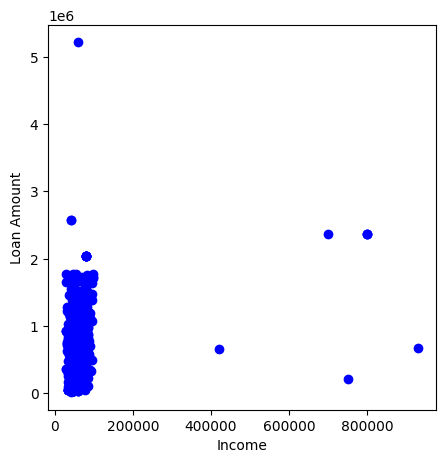

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(customer_profiles["Income"], customer_profiles['Loan Amount'], color='blue')
plt.xlabel('Income')
plt.ylabel('Loan Amount')

Text(0.5, 0, 'Expenditure')

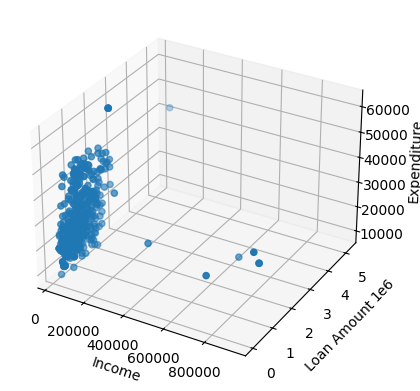

In [7]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(customer_profiles['Income'], customer_profiles['Loan Amount'], customer_profiles['Expenditure'])
ax.set_xlabel("Income")
ax.set_ylabel("Loan Amount")
ax.set_zlabel("Expenditure")

Text(0.5, 1.0, 'Distribution of Potential Features')

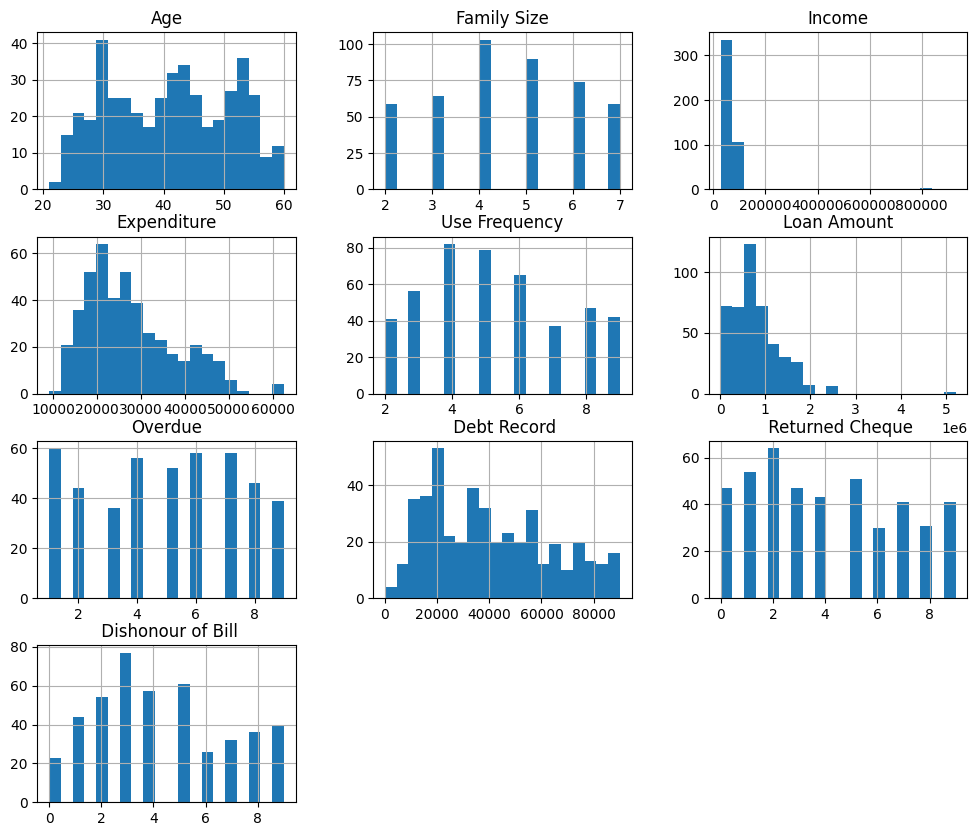

In [8]:
customer_profiles[features].hist(figsize=(12, 10),bins=20)
plt.title('Distribution of Potential Features')

In [9]:
customer_profiles.describe()

,Age,Family Size,Income,Expenditure,Use Frequency,Loan Amount,Overdue,Debt Record,Returned Cheque,Dishonour of Bill
count,449.000000,449.000000,449.000000,449.000000,449.000000,4.490000e+02,449.000000,449.000000,449.000000,449.000000
mean,40.964365,4.518931,68865.351893,27504.463252,5.291759,7.914757e+05,4.928731,40256.525612,4.084633,4.309577
std,10.264083,1.564170,88517.998985,10338.143275,2.083513,5.520810e+05,2.536219,23289.870583,2.834255,2.595484
min,21.000000,2.000000,28366.000000,9000.000000,2.000000,1.535000e+04,1.000000,0.000000,0.000000,0.000000
25%,31.000000,3.000000,45213.000000,19870.000000,4.000000,4.000850e+05,3.000000,20000.000000,2.000000,2.000000
50%,42.000000,4.000000,55999.000000,25605.000000,5.000000,7.229070e+05,5.000000,36394.000000,4.000000,4.000000
75%,50.000000,6.000000,73656.000000,33541.000000,7.000000,1.042737e+06,7.000000,57206.000000,7.000000,6.000000
max,60.000000,7.000000,930000.000000,62541.000000,9.000000,5.214789e+06,9.000000,90000.000000,9.000000,9.000000


## Clustering Data
* Utilize clustering to group customers into unique groups based on similar characteristics and behavior.
* https://www.youtube.com/watch?v=iNlZ3IU5Ffw : Used this video for help

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # VERY IMPORTANT FOR CLUSTERING, ENSURE FAIR DISTANCE COMPUTATIONS

numeric_features = customer_profiles[['Age', 'Family Size', 'Income', 'Expenditure', 'Use Frequency', 'Loan Amount', 'Overdue', ' Debt Record', ' Returned Cheque', " Dishonour of Bill"]] 

scaler = StandardScaler()
standard_customer_profiles = scaler.fit_transform(numeric_features) # Scaling numeric features to be clustered

standard_customer_profiles = pd.DataFrame(standard_customer_profiles, columns=['Age', 'Family Size', 'Income', 'Expenditure', 'Use Frequency', 'Loan Amount', 'Overdue', ' Debt Record', ' Returned Cheque', " Dishonour of Bill"])

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

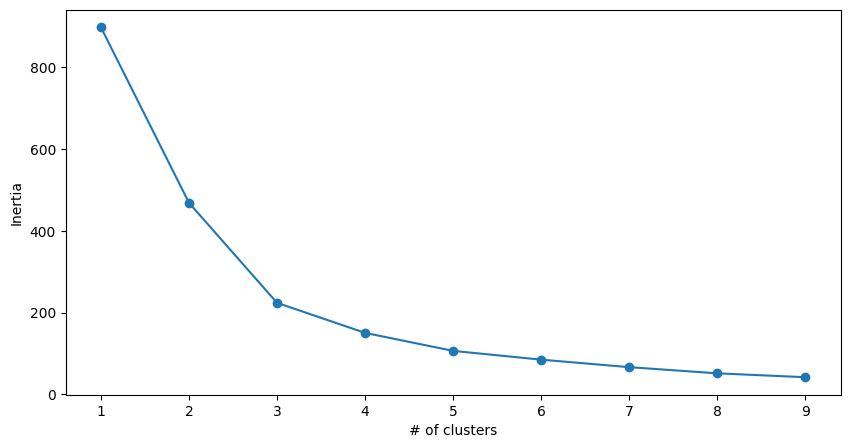

In [22]:
# Optimize number of clusters using Elbow Method, refer to video linked above for more help
def optimize_k_means(data: pd.DataFrame, max_k: int):
    mean, ineritia = [], []
    
    for k in range(1, max_k):
        kmean = KMeans(n_clusters=k)
        kmean.fit(data)
        
        mean.append(k)
        ineritia.append(kmean.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(mean, ineritia, 'o-')
    plt.xlabel('# of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
optimize_k_means(standard_customer_profiles[['Income', 'Loan Amount']], 10)


In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(standard_customer_profiles[['Income', 'Loan Amount']])